In [25]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import phik
from phik import resources, report
import warnings
warnings.filterwarnings("ignore")

# Univariate Analysis on train data

In [26]:
train=pd.read_csv("train_users_2.csv")
print(train.shape)
train.head(5)

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


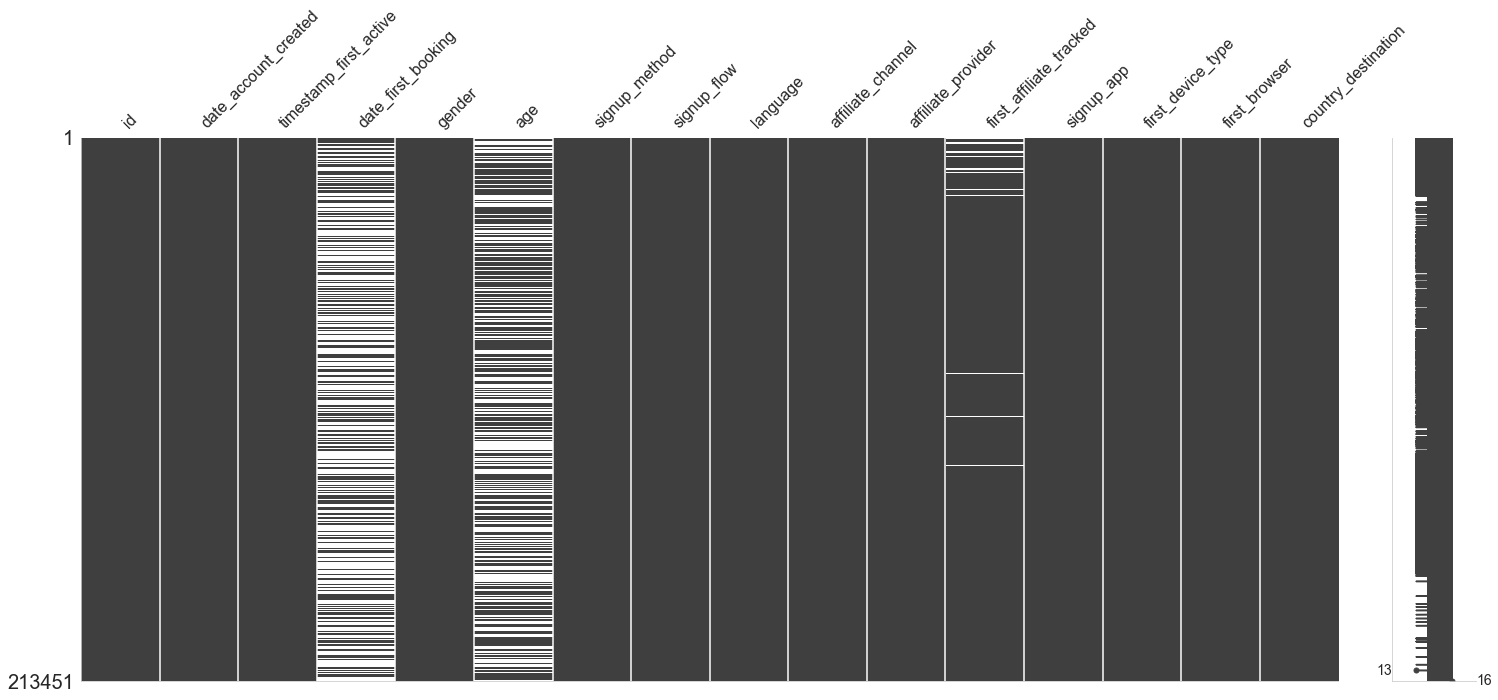

In [27]:
import missingno as miss
miss.matrix(train)
sns.despine()

1. From the above plot we can see that there and many missing values into the date_first_booking column,age and first_affiliate_tracked.
2. There are 58% of the values from the total data which are missing for date_first_booking and 42% of the values from the age variable are missing.
2. We have to use some mechanism to handle all these missing values.

In [28]:
train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

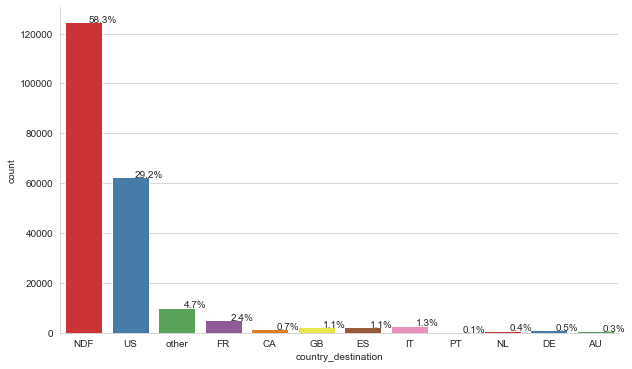

In [29]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="country_destination", data=train,palette='Set1')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/train.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

1. From above we can se NDF(no destination found) are having highest percentage as class label which is followed by US and others.
2. Most of the users are who have registered and didnt have booked any travel.
3. While other than NDF most of the users prefer to travel for US.
4. There are few percentages of people who use to travel to others counteris like itally,spain,great britain,etc.

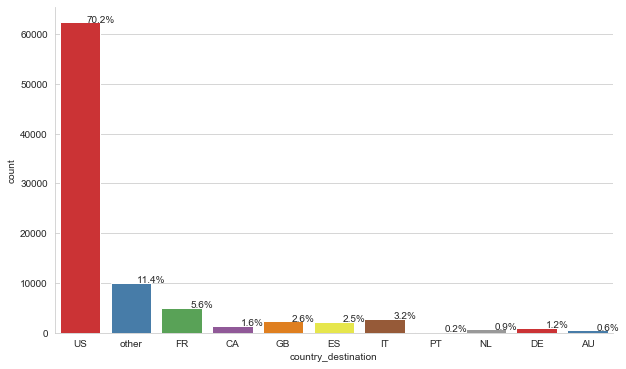

In [30]:
train1=train[train['country_destination']!='NDF']

plt.figure(figsize=(10,6))
ax = sns.countplot(x="country_destination", data=train1,palette='Set1')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/train1.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

1. After excluding the NDF class label we can see US is having about 70% where people use to book a travel.
2. About 11% people use to travel other countries which are not into the class label.
3. Few people use to travel to France after US.
4. Other countries are having very few percentage of users.

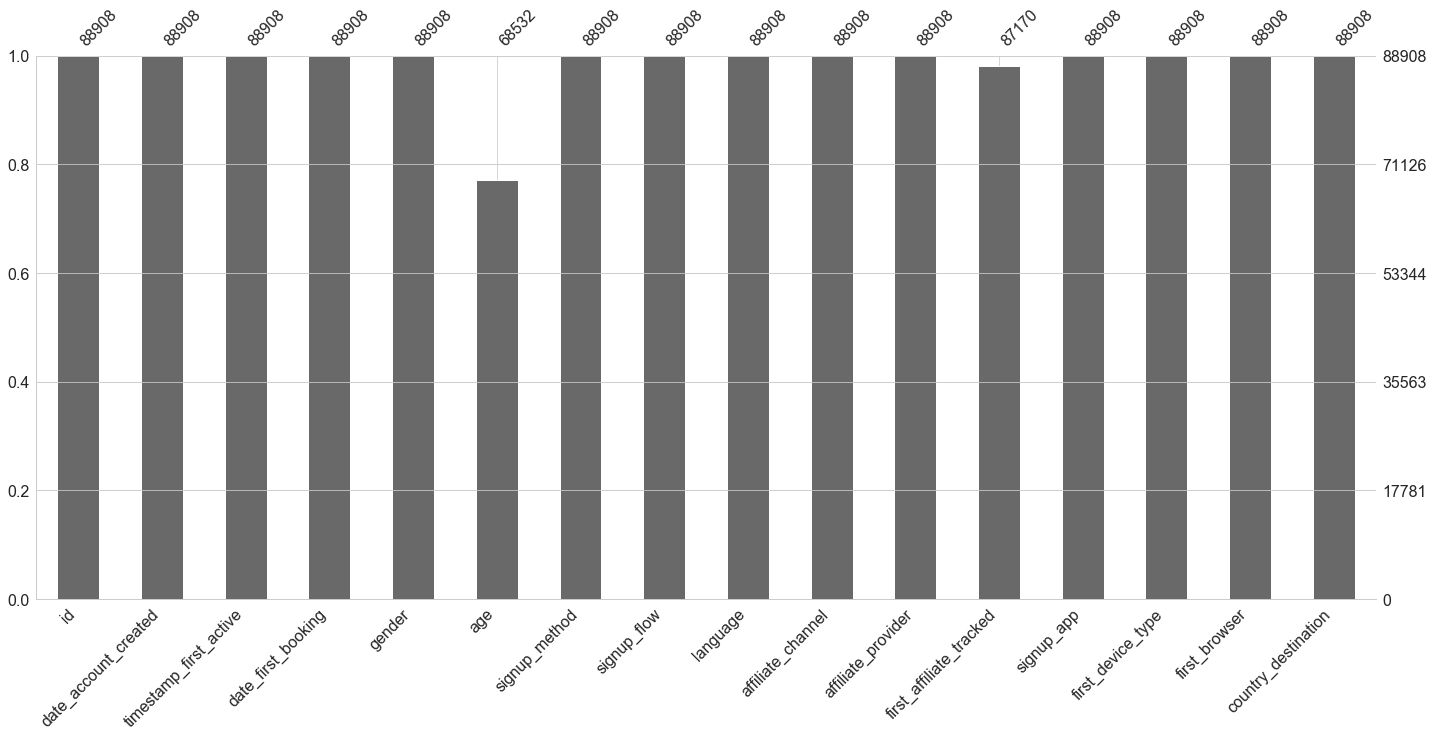

In [31]:
import missingno as miss
miss.bar(train1)
sns.despine()

After removing the NDF class label from out data set we can see now data looks much cleaner as only age feature is having about 22% null values.We can use this data for further EDA.

In [32]:
df=train1.sample(n=1000)
df.phik_matrix()

interval columns not set, guessing: ['timestamp_first_active', 'age', 'signup_flow']


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
date_account_created,1.0,1.000000,1.000000,0.998895,0.000000,0.810190,0.000000,0.931673,0.864787,0.865208,0.912039,0.000000,0.000000,0.000000,0.400741,0.000000
timestamp_first_active,1.0,1.000000,1.000000,0.995580,0.100352,0.000000,0.108452,0.393052,0.000000,0.209505,0.209154,0.230251,0.147069,0.264209,0.220462,0.103957
date_first_booking,1.0,0.998895,0.995580,1.000000,0.627995,0.775023,0.621147,0.571549,0.747533,0.790006,0.776091,0.000000,0.000000,0.672461,0.282459,0.000000
gender,1.0,0.000000,0.100352,0.627995,1.000000,0.000000,0.294078,0.092066,0.000000,0.156479,0.389557,0.000000,0.000000,0.000000,0.000000,0.026349
age,1.0,0.810190,0.000000,0.775023,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
signup_method,1.0,0.000000,0.108452,0.621147,0.294078,0.000000,1.000000,0.334979,0.000000,0.244519,0.273976,0.000000,0.292516,0.104538,0.000000,0.000000
signup_flow,1.0,0.931673,0.393052,0.571549,0.092066,0.000000,0.334979,1.000000,0.000000,0.612131,0.536740,0.111467,0.715695,0.478148,0.554429,0.215937
language,1.0,0.864787,0.000000,0.747533,0.000000,0.000000,0.000000,0.000000,1.000000,0.040836,0.419198,0.000000,0.000000,0.272670,0.211369,0.000000
affiliate_channel,1.0,0.865208,0.209505,0.790006,0.156479,0.000000,0.244519,0.612131,0.040836,1.000000,0.871901,0.571704,0.637679,0.382119,0.278736,0.000000


# Univariate analysis

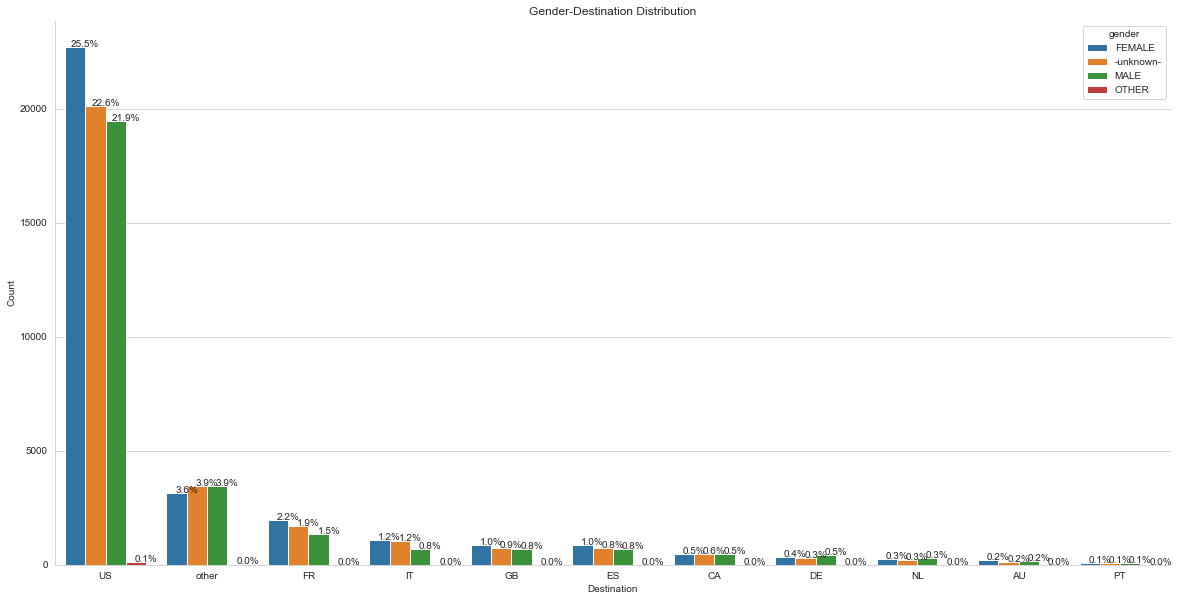

In [33]:
#Gender-Destination Distribution Plot

plt.figure(figsize=(20,10))
ax=sns.countplot(data = train1, x = 'country_destination', order = train1['country_destination'].value_counts().index , hue='gender')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Gender-Destination Distribution')
total = float(len(train1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

1. From above we can see, people who are making travel to US majority of them are females followed by followed by unknown and males.
2. Same above pattern can be observe for France and other countries.
3. As a conclusion for US,FR females prefer more to travel than males, for rest of the countries there is not much difference in travel to genders.

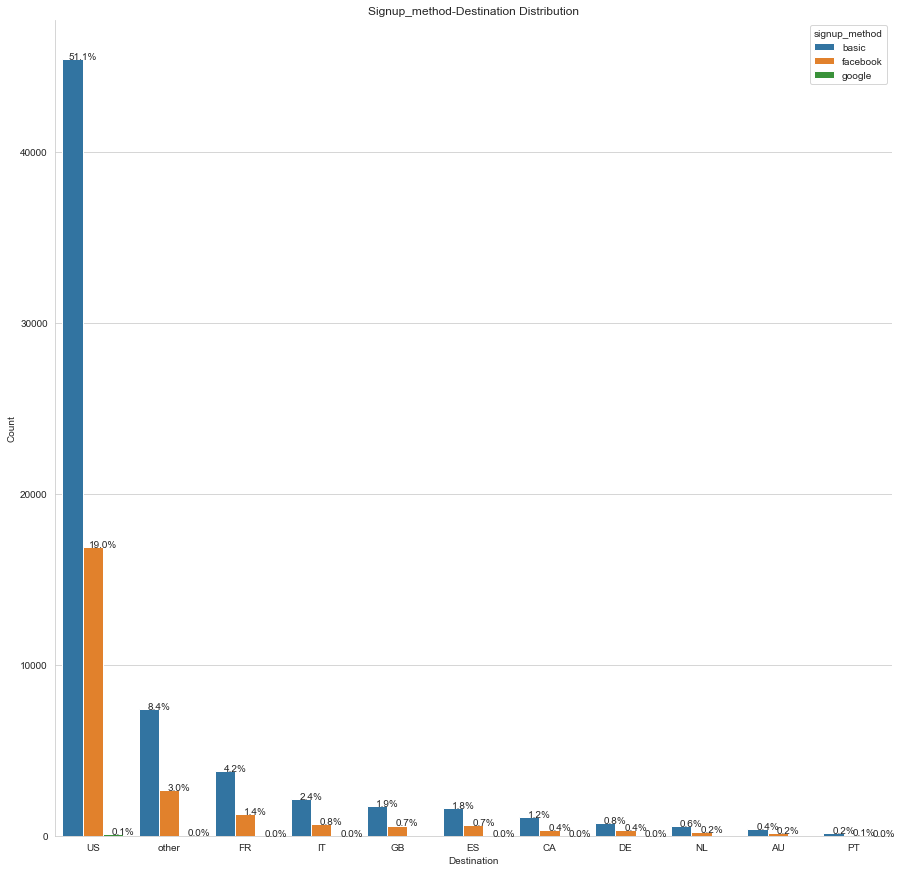

In [34]:
plt.figure(figsize=(15,15))
ax=sns.countplot(data = train1, x = 'country_destination', order = train1['country_destination'].value_counts().index , hue='signup_method')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Signup_method-Destination Distribution')
total = float(len(train1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
#plt.show()
sns.despine()

1. From above people who wish to travel to US most of them are using signup method as basic while less than half are using signup_method as facebook.
2. Also from other countries also we can observe most of them are using signup_method as basic and half of the users are using facebook as sigup_method.
3. We can conclude those who are making travel are generally using basic method for signup_method.

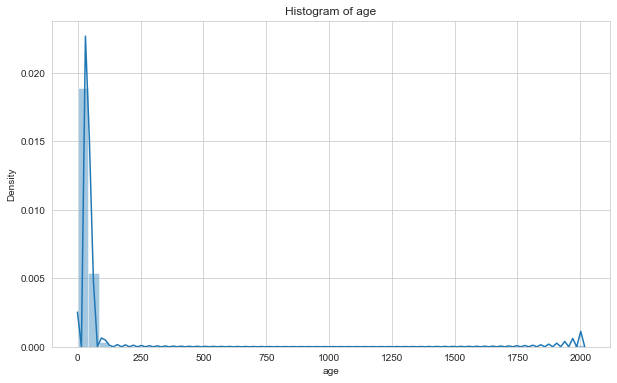

In [35]:
#Probability Density Function

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(train1['age'])
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

1. As we can see from above most of the values are between 0 to 100.
2. There are many outliers which are having age values greater than 100 and maximum age value is 2014 which might user have entered year in place of age.
3. We will be removing these outliers and will visualize it again.

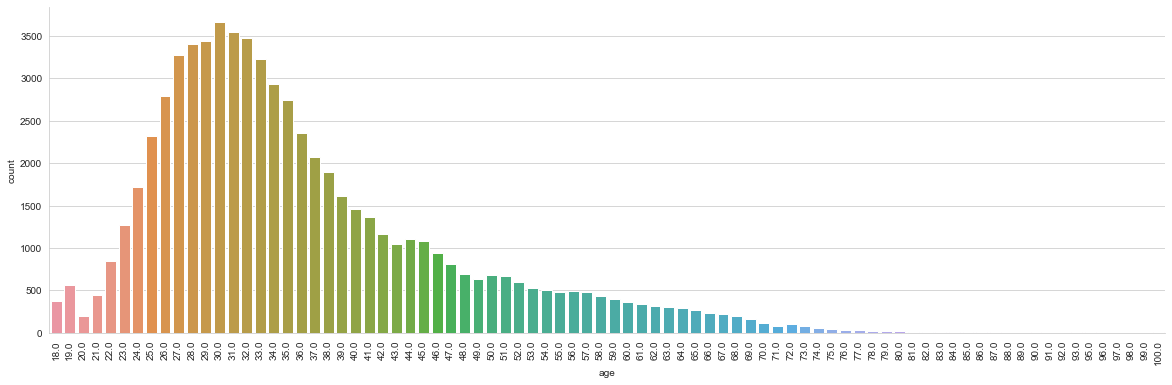

In [36]:
train1.loc[train1.age<18]=np.nan
train1.loc[train1.age>100]=np.nan

#Countplot for age
plt.figure(figsize=(20,6))
sns.countplot(train1.age)
plt.xticks(rotation=90)
sns.despine()

1. After removing the outliers from age variable we can the above plot which is heavyly right skewed.
2. Most of the user are having age between 25 to 40.
3. Very few people are having ages greater than 50 also we can observe the count values decreases as the age value increses.
4. We can conclude, Most of users who are booking travel usually are having ages between 25 to 40 while elder people rarely use to travels.  

<Figure size 1440x720 with 0 Axes>

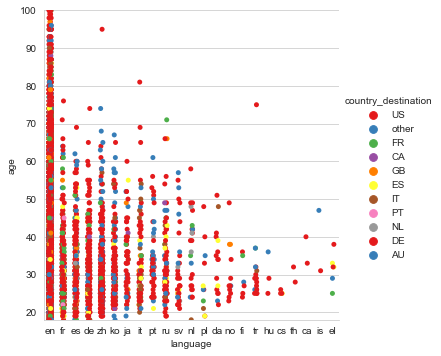

<Figure size 1440x720 with 0 Axes>

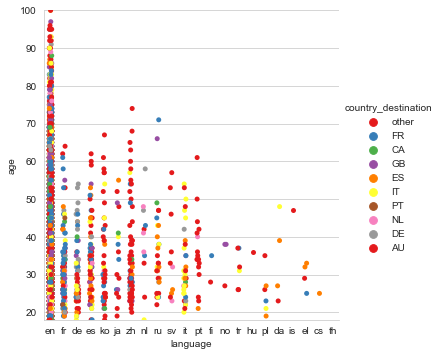

In [37]:

plt.figure(figsize=(20,10))
sns.catplot(x="language", y="age", data=train1,hue='country_destination',palette='Set1')
plt.ylim(18,100)
sns.despine()

train2=train1[train1['country_destination']!='US']

plt.figure(figsize=(20,10))
sns.catplot(x="language", y="age", data=train2,hue='country_destination',palette='Set1')
plt.ylim(18,100)
sns.despine()

1. In the first plot we can observe that people who speak english are making travel to all the countries and and most of them are travelling to US and most of them are having their age as beetween 20 to 70. 
2. In the second plot after removing US class label, people speaking english are having variable ages.
3. People of speak zh language are having age mostly between 22 to 40 or are usually younger and are travelling to other countries. 

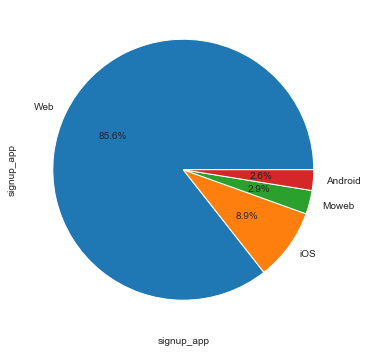

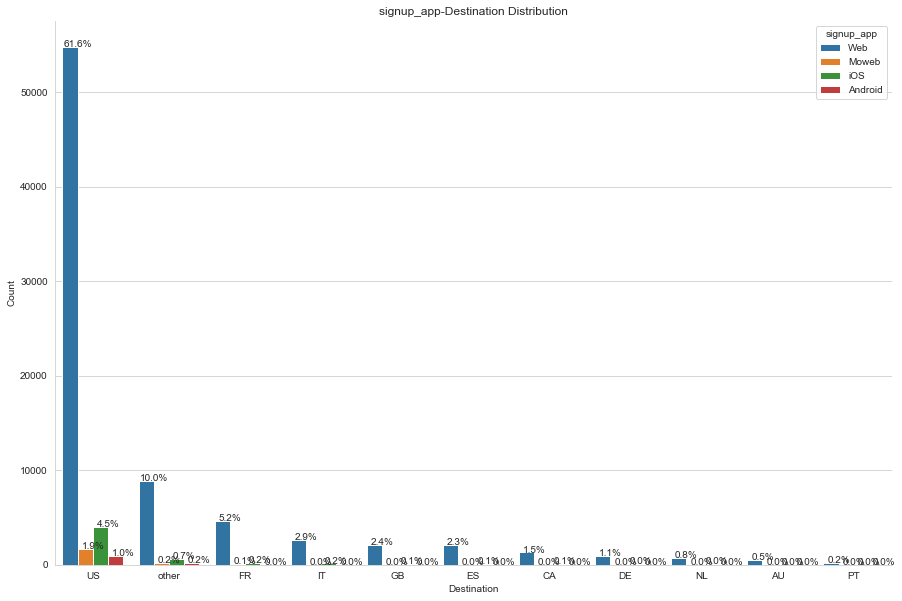

In [39]:
#Bar plot for signup_app

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
percentage = train['signup_app'].value_counts() / train.shape[0] * 100
percentage.plot(kind='pie',autopct="%1.1f%%")
plt.xlabel('signup_app')
sns.despine()

plt.figure(figsize=(15,10))
ax=sns.countplot(data = train1, x = 'country_destination', order = train1['country_destination'].value_counts().index , hue='signup_app')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('signup_app-Destination Distribution')
total = float(len(train1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
#plt.show()
sns.despine()

1. From 1st plot we can observe that about 85% users are having signup method as web and abt 9% are having signup method as iOS while android and moweb are having very low percentages.
2. From 2nd plot 62% of peole who are travelling to US and having signup app as Web also peole who are using iOS as signup app almost all are making travel to the US.

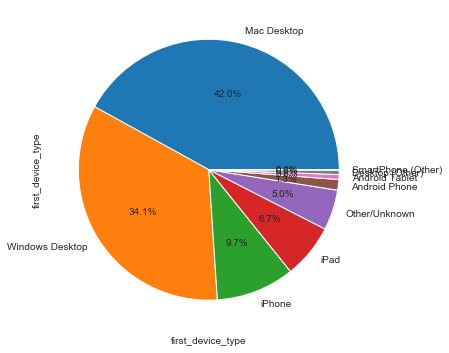

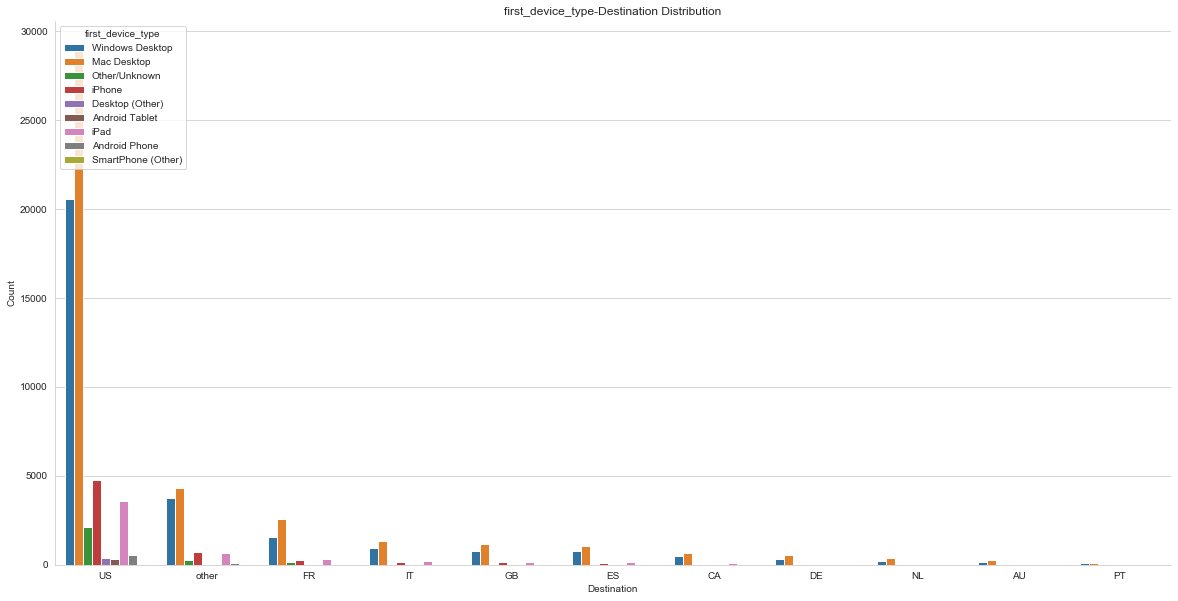

In [40]:
#Bar plot for first_device_type

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
percentage = train['first_device_type'].value_counts() / train.shape[0] * 100
percentage.plot(kind='pie',autopct="%1.1f%%")
plt.xlabel('first_device_type')
sns.despine()

plt.figure(figsize=(20,10))
ax=sns.countplot(data = train1, x = 'country_destination', order = train1['country_destination'].value_counts().index , hue='first_device_type')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('first_device_type-Destination Distribution')
sns.despine()

1. For People travelling to US most of them are having first_device type as Mac Desktop followed by the windows desktop.
2. Also if a person is using iphone or ipad he will be mostly tavelling to US.
3. None of the iPhone user is making travel to other counteris like IT,CA,etc other than US and other.

In [41]:
# Splitting date time data for date account created and date_first_booking

train1['account_created_day'] = pd.DatetimeIndex(train1['date_account_created']).day
train1['account_created_month'] = pd.DatetimeIndex(train1['date_account_created']).month
train1['first_booking_day'] = pd.DatetimeIndex(train1['date_first_booking']).day
train1['first_booking_month'] = pd.DatetimeIndex(train1['date_first_booking']).month
train1.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_day,account_created_month,first_booking_day,first_booking_month
2,4ft3gnwmtx,2010-09-28,2.009061e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US,28.0,9.0,2.0,8.0
3,bjjt8pjhuk,2011-12-05,2.009103e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,5.0,12.0,8.0,9.0


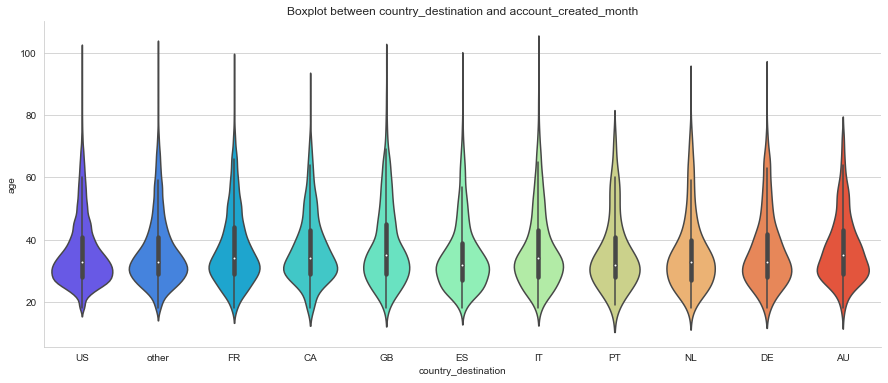

In [42]:
#Boxplot between country_destination and age
train1.loc[train1.age<18]=np.nan
train1.loc[train1.age>100]=np.nan
plt.figure(figsize=(15,6))
sns.violinplot(data=train1 , y='age', x='country_destination',palette='rainbow')
plt.title('Boxplot between country_destination and account_created_month')
#plt.ylim(0,100)
sns.despine()

1. For users who are travelling to US,other,and NL are having almost same age group.
2. Users who wish to travel to FR,DE,GB and AU are usually older than other users.
3. Users who wish to travel to ES and PT are usually younger than other users.

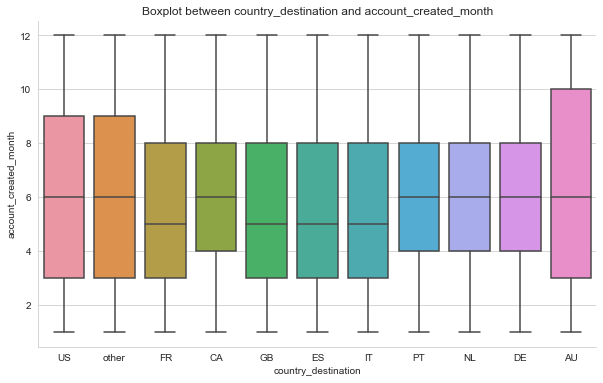

In [43]:
#Boxplot between country_destination and account_created_month

plt.figure(figsize=(10,6))
sns.boxplot(data=train1 , y='account_created_month', x='country_destination')
plt.title('Boxplot between country_destination and account_created_month')
sns.despine()

1. From above it can be seen that users who are travelling to GB,ES,FR and IT most of them have created their account in the early year.
2. People who wish to travel US,other,CA,PT,NL,DE most of them have created their account into the mid of year.
3. While People who are travelling to AU  have created_account_month is variable from march to octobar.
4. As conclusion user travelling to GB,ES,FR and It are creating their account in early year.

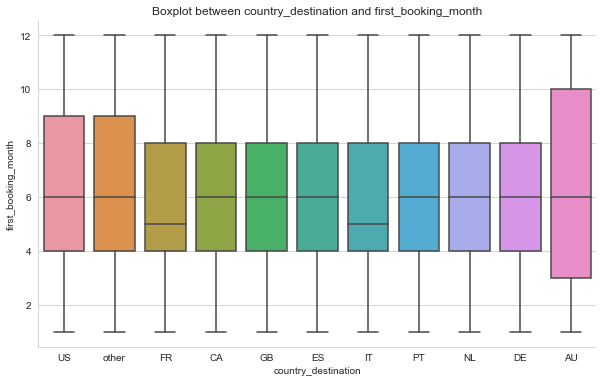

In [44]:
#Boxplot between country_destination and first_booking_month

plt.figure(figsize=(10,6))
sns.boxplot(data=train1 , y='first_booking_month', x='country_destination')
plt.title('Boxplot between country_destination and first_booking_month')
sns.despine()

1. From above plot we can observe people who wish to travel to FR and IT are making their booking into the early year i,e most of them are having booking into the may.
2. Some of the users who wish to travel to US,other and AU are also making first booking into the september.

# Bivariate Analysis

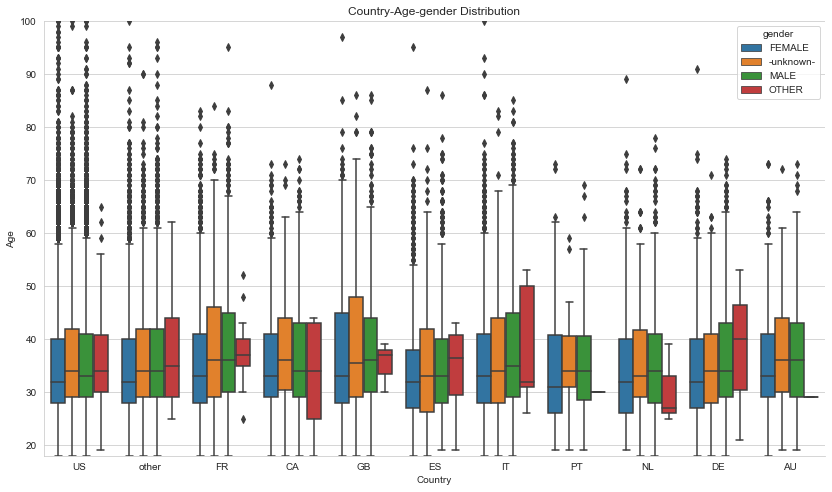

In [45]:
#Box plot between Age,Gender and Country

plt.figure(figsize=(14,8))
sns.boxplot(data=train1,y='age',x='country_destination',hue='gender')
plt.ylim(18,100)
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Country-Age-gender Distribution')
sns.despine()

1. From above we can observe that female users who are younger prefer to travel countries like US,FR,ES and PT.
2. female user who are older some of them have made a travel to GB.
3. People whose gender is other and are older usually book a travel to DE.
3. People whose gender is other and are younger usually book a travel to NL.
4. User whose gender is unknown,Male and are older most of them booke travel to France.

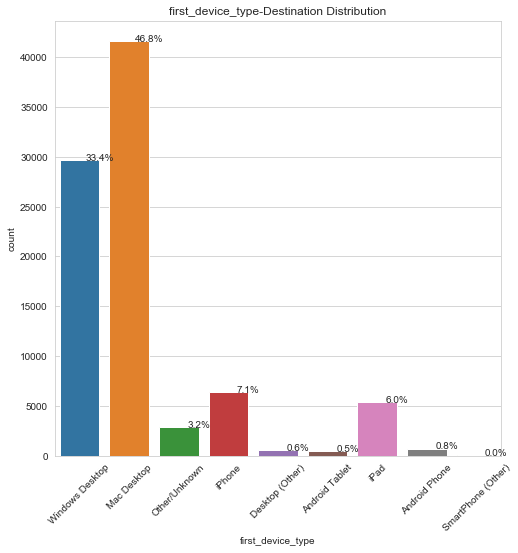

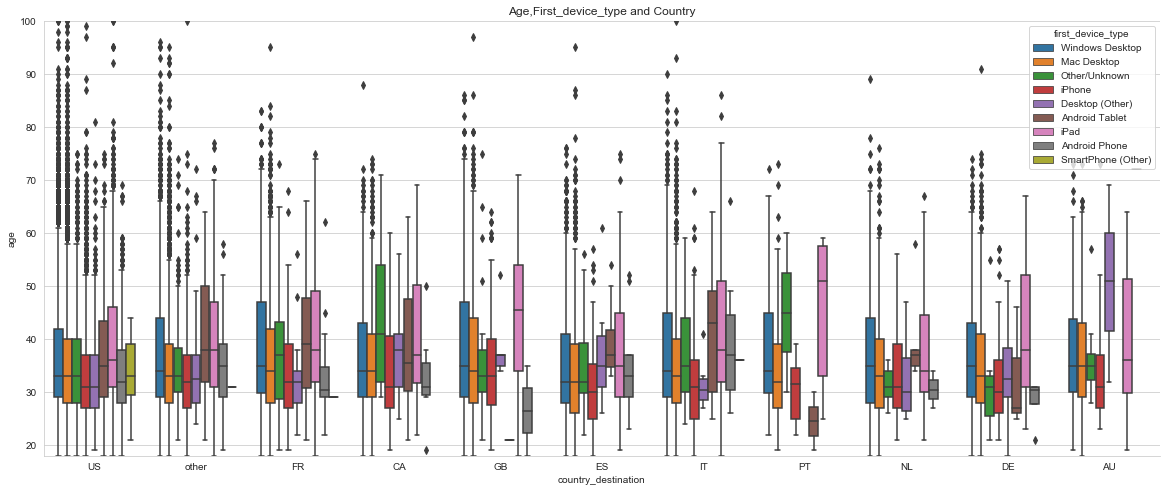

In [47]:
#Box plot between Age,First_device_type and Country

plt.figure(figsize=(8,8))
ax=sns.countplot(data = train1, x = 'first_device_type' )
plt.title('first_device_type-Destination Distribution')
plt.xticks(rotation=45)
total = float(len(train1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')


plt.figure(figsize=(20,8))
sns.boxplot(data=train1,y='age',x='country_destination',hue='first_device_type')
plt.ylim(18,100)
#plt.xlabel('Country')
#plt.ylabel('Age')
plt.title('Age,First_device_type and Country')
sns.despine()

1. In the first plot we can see the distribution of first_device_type as most of the users are of mac desktop followed by windows dsktop, very few are using android device type.
2. In the second plot we can observe that,User who are using iPad as first_device_type and older usually book a travel to GB and PT.
3. If a user is using iPhone and younger mostly book travel to countries like US,FR,CA,ES,IT and PT
4. User who are using device as android tablet and are younger makes a travel to PT.
5. User who are using device as android and are younger makes a travel to GB.
1. User who are using device as Unknown/other and are older makes a travel to PT.